In [105]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [106]:
import numpy as np
import pandas as pd

In [107]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [108]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [109]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [110]:
# reflect an existing database into a new model
Base = automap_base()

In [111]:
# reflect the tables
Base.prepare(engine, reflect= True)

In [112]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [113]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [114]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [115]:
#create inspector
inspector = inspect(engine)

In [116]:
#find out columns 
inspector.get_table_names()

['measurement', 'station']

In [117]:
#get data from date above and and before(12 months)
last_yr = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
last_yr

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#find out last date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
#print
last_date

'2017-08-23'

In [119]:
#create df for above results
df_last_yr = pd.DataFrame(data=last_yr)
df_last_yr

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [120]:
#chanage index
df_last_yr = df_last_yr.set_index("date")
df_last_yr

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [121]:
# Use Pandas to plot
y_axis = df_last_yr["prcp"].tolist()
x_axis = np.arange(0,len(df_last_yr.index.tolist()), 1)

<BarContainer object of 2223 artists>

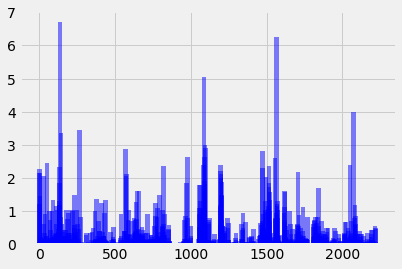

In [122]:
plt.bar(x_axis, y_axis, width=30,color='blue', alpha=0.5, align="center")

In [138]:
#percepitation
df_last_yr.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [123]:
# Design a query to show how many stations are available in this dataset?
Station_total = session.query(func.count(Station.station)).first()
print(Station_total)

(9,)


In [124]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active= engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()
most_active

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [125]:
#change order
active_des = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(active_des)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [126]:
#most active stattion using for low,high,average
active_station=active_des[0][0]
print(active_station)

USC00519281


In [127]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
print(active_temps)

[(54.0, 85.0, 71.66378066378067)]


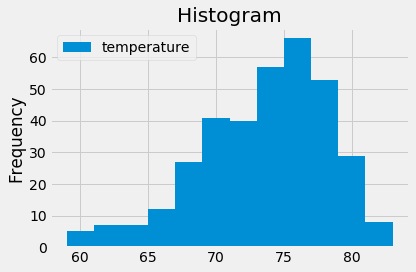

In [128]:
# Choose the station with the highest number of temperature observations.
highest_temp= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_temp= highest_temp[0]


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query( Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.station == highest_temp).all()
temp_data = pd.DataFrame(temp_data, columns=['temperature'])


# We need 12 bins since the observation is for twelve months
temp_data.plot.hist(bins=12, title= "Histogram")
plt.tight_layout()
plt.savefig("Resources/TempFrequency.png")
plt.show()

In [129]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [135]:
trip_start= dt.date(2018, 7, 1) - dt.timedelta(days=365)
trip_end = dt.date(2018, 7, 20) - dt.timedelta(days=365)

temp_trip = (calc_temps(trip_start, trip_end))
print(temp_trip)

[(69.0, 78.29032258064517, 87.0)]


(0, 105)

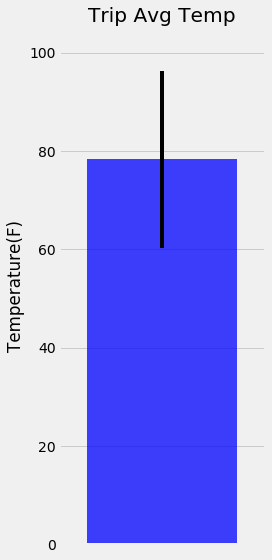

In [137]:

tmin,tavg,tmax = temp_trip[0]

error = tmax - tmin
xpos = 1
height = tavg
plt.figure(figsize=(4,8))
plt.bar(xpos,height,yerr=error,alpha = 0.75,color = "blue")
plt.xticks([])
plt.yticks(np.arange(0,120,20))
plt.ylabel("Temperature(F)")
plt.title("Trip Avg Temp")
plt.tight_layout()
plt.xlim(0.45,1.55)
plt.ylim(0,105)
